# Statistical hypothesis testing
Statistical hypothesis testing is framework for making statistical decision using experimental data.
Basically an assumption about population parameter.

## Statistical hypothesis testing framework
It is based on idea of null hypothesis.

### Null Hypothesis H0:
This is basically the default position or nothing interesting is happening.
e.g In the scenario, does the average age in two groups differs, H0 will be mean age doesn't differ.



### Alternative hypothesis  H1:

It is a hypothesis contrary to the H0, i.e something interesting is going on.

### P- value:
 Probability of finding the observed or more extreme results, when H0 is true.

### Significance level $\alpha$:
It is the probability level when you reject H0. if p-value is <= to $\alpha$, we reject H0 in favour of H1.



<font color = "red"> Note: Please check all the assumption before using any statistical test  </font>

# t- test(For numerical values)

Statistical test to determine if sample differs from population or are two samples different.

Test statistic follows a Student's t-distribution under the null hypothesis.

# one sample t-test
whether sample mean differs from population means

In [130]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
np.random.seed(1)
population_age= stats.poisson.rvs(mu=35, size=150000)
print(population_age)
print(population_age.mean())
sample_age= stats.poisson.rvs(mu=20, size=30)
print(sample_age)
print(sample_age.mean())

[33 28 29 ... 28 40 36]
34.98306
[24 27 13 20 22 19 21 13 15 16 26 11 17 22 17 27 23 21 18 18 21 19 21 15
 24 19 22 16 22 21]
19.666666666666668


Let's check if sample comes from same distribution as population

In [14]:
stats.ttest_1samp(a= sample_age, popmean=population_age.mean())

Ttest_1sampResult(statistic=-20.563284467143248, pvalue=7.723574796808776e-19)

Let's check if t-statistics lies outside the quantile corresponding to our confidence interval. If yes, we reject the null hypothesis.

In [16]:
stats.t.ppf(q=0.025,df=29), stats.t.ppf(q=0.975, df=29)

(-2.0452296421327034, 2.045229642132703)

p-value(of seeing a result as extreme as the one we observed, if the null hypothesis was true. )

In [17]:
stats.t.cdf(x= -20.563284467143248,
               df= 29) * 2 

7.723574796808776e-19

This is less than our significance level $\alpha=0.05$, hence we reject the null hypothesis

and 95% confidence interval for sample

In [20]:
sig = sample_age.std()/np.sqrt(30)
stats.t.interval(0.95,df= 29, loc= sample_age.mean(), scale= sig)


(18.168898909048146, 21.16443442428519)

# Two-Sample T-Test

means of two independent data samples differ or not

H0: ?

In [21]:
sample_age1= stats.poisson.rvs(mu=22, size=30)

In [22]:
stats.ttest_ind(a= sample_age,
                b= sample_age1,
                equal_var=False) 

Ttest_indResult(statistic=-2.58136764359264, pvalue=0.012429979585138511)

i.e if two sample are same then there are 1.2 % chance of seeing different samples.

With 95% confidence level we fail to reject null hypothesis,

## Paired T-Test (stats.ttest_rel())

Testing differences between samples of the same group at different time.

In [9]:
# Some sample data
np.random.seed(1)
data_t1= stats.norm.rvs(loc=160, scale=20, size= 80)
data_t2= stats.norm.rvs(loc=150, scale = 30, size= 80)

df = pd.DataFrame()
df['val_t1'] = data_t1
df['val_t2'] = data_t2
df.head()

,val_t1,val_t2
0,192.486907,143.330156
1,147.764872,143.977258
2,149.436565,155.596842
3,138.540628,162.301549
4,177.308153,155.948992


In [4]:
df.describe()

,val_t1,val_t2
count,80.000000,80.000000
mean,160.990144,152.172228
std,19.237938,25.422797
min,113.969226,76.954867
25%,146.512669,139.448655
50%,160.295491,153.612449
75%,175.570041,167.993369
max,203.711508,215.609389


In [ ]:
# There is difference of
df.describe().loc['mean'].diff()

Let's see if this difference is significant at 95% confidence level

In [8]:
stats.ttest_rel(a= data_t1, b = data_t2)

Ttest_relResult(statistic=2.7542523684573825, pvalue=0.007298086430405468)

### Type I error(False positive, false hit): 
When we reject the null hypothesis, although that hypothesis was true. It is equal to the significance level $\alpha$. So higher the confidence lower the chance of False positive. We're accepting a $\alpha$ chance of rejecting the null even if it is true.

### Type II errors(False negative or miss): 
When we accept the null hypothesis but it is false. More confidence level, higher type II error.

# Statistical test for categorical variables: the chi-squared test(Uses chi-squared statistic).

## Chi-Squared Goodness-Of-Fit Test

It is analogous to t-test but for categorical data. Checks whether distribution of sample matches an expected 
distribution.

Note. Actual value doesn't matter. We care about the frequency or counts in categories.

Let's check whether distribution of  master and PhD at DU matches at national distribution. 

Note: This is made up dataset

In [16]:
du_df = pd.DataFrame({"enrollement_level":400*["M"] + 50*["PHD"]})
du_df.head()

,enrollement_level
0,M
1,M
2,M
3,M
4,M


In [17]:
us_df = pd.DataFrame({"enrollement_level":45000*["M"] + 5000*["PHD"]})
us_df.head()

,enrollement_level
0,M
1,M
2,M
3,M
4,M


In [24]:
du_tbl = pd.crosstab(index= du_df['enrollement_level'], columns='freq')
du_tbl

col_0,freq
enrollement_level,
M,400
PHD,50


In [25]:
us_tbl =pd.crosstab(index= us_df['enrollement_level'], columns='freq')
us_tbl

col_0,freq
enrollement_level,
M,45000
PHD,5000


chi-squared statistic 

$$\tilde{\chi}^2_c = \sum_{i=1}^{L}\frac{(O_i - E_i)^2 }{E_i}$$

$O_i$ is observed count and $E_i$ expected count for $i^{th}$ row in contingency table.

In [27]:
us_tbl.sum()

col_0
freq    50000
dtype: int64

In [30]:
O = du_tbl
E= (us_tbl/us_tbl.sum())*du_tbl.sum()

In [31]:
E

col_0,freq
enrollement_level,
M,405.0
PHD,45.0


In [34]:
chi_sq = ((O-E)**2/E).sum()

In [35]:
chi_sq

col_0
freq    0.617284
dtype: float64

Let's find the critical value for 95% confidence level and check the p-value.

Note degree of freedom = number of variable categories -1

In [38]:
critical_value = stats.chi2.ppf(q = 0.95, 
                      df = 1) 
critical_value

3.841458820694124

We don't exceed the critical value of chi sq, hence we fail to reject null hypothesis.

In [37]:
# right tail of the chi-square distribution
p_val = 1- stats.chi2.cdf(chi_sq, df =1)
p_val

array([0.43205838])

Also p values is not less than $\alpha= 0.05$

Or using scipy

In [39]:
stats.chisquare(f_obs=O, f_exp=E)

Power_divergenceResult(statistic=array([0.61728395]), pvalue=array([0.43205838]))

# Chi-Squared Test of Independence

 Tests whether two categorical variables are independent

In [68]:
np.random.seed(1)

voters_df = pd.DataFrame({"race":np.random.choice(["asian","black","hispanic","white","other"], size= 500), 
                       "party":np.random.choice(["democrat","republican","independent"], size= 500)})
voters_df.head()

,party,race
0,republican,white
1,independent,other
2,democrat,asian
3,independent,black
4,independent,white


In [74]:
voter_tbl = pd.crosstab(voters_df.race, voters_df.party, margins=True)
voter_tbl

party,democrat,independent,republican,All
race,,,,
asian,31,37,36,104
black,28,26,36,90
hispanic,34,40,26,100
other,30,34,46,110
white,31,36,29,96
All,154,173,173,500


In [76]:
O_df = voter_tbl.iloc[0:5,0:3]
O_df

party,democrat,independent,republican
race,,,
asian,31,37,36
black,28,26,36
hispanic,34,40,26
other,30,34,46
white,31,36,29


In [77]:
E = np.outer(voter_tbl.All.iloc[0:5], voter_tbl.loc['All'][0:3])/voter_tbl.loc['All'][3]
E_df= pd.DataFrame(E, index= ["asian","black","hispanic","other","white"], columns = ["democrat","independent","republican"])

E_df.head()

,democrat,independent,republican
asian,32.032,35.984,35.984
black,27.720,31.140,31.140
hispanic,30.800,34.600,34.600
other,33.880,38.060,38.060
white,29.568,33.216,33.216


In [78]:
chi_squared = (((O_df-E_df)**2)/E_df).sum().sum()
chi_squared

8.356179476942746

In [79]:
critical_value = stats.chi2.ppf(.95, df = 2*4)
critical_value

15.50731305586545

In [80]:
# and p value
1- stats.chi2.cdf(chi_squared, df = 2*4)

0.3994730611219156

or using scipy stats

In [82]:
stats.chi2_contingency(observed=O_df)

(8.356179476942744, 0.3994730611219159, 8, array([[32.032, 35.984, 35.984],
        [27.72 , 31.14 , 31.14 ],
        [30.8  , 34.6  , 34.6  ],
        [33.88 , 38.06 , 38.06 ],
        [29.568, 33.216, 33.216]]))

There are no relationships between the race and party at $\alpha = .05$ significance level

# ANOVA(analysis of variance)

Comparing multiple groups(more than 2) at the same time

## One-Way ANOVA

Test if mean differs across level of a categorical variable. [F- distribution](https://en.wikipedia.org/wiki/F-distribution) is used as a null distribution.

In [132]:
# Let's buld some weight data based on excercise routine
np.random.seed(1)
routine = ["no_excercise", "10_minutes", "30_minutes"]
weight_df = pd.DataFrame({"regime":np.random.choice(routine, size= 500), 
                       "weight":stats.poisson.rvs(loc= 150, mu= 30, size= 500)})
weight_df.head(10)

,regime,weight
0,10_minutes,180
1,no_excercise,182
2,no_excercise,182
3,10_minutes,184
4,10_minutes,180
5,no_excercise,187
6,no_excercise,181
7,10_minutes,187
8,no_excercise,182
9,10_minutes,182


In [133]:
groups = weight_df.groupby('regime').groups

In [134]:
no_exercise = weight_df['weight'].loc[groups["no_excercise"]]
minutes_10 = weight_df['weight'].loc[groups["10_minutes"]]
minutes_30 = weight_df['weight'].loc[groups["30_minutes"]]



In [136]:
stats.f_oneway(no_exercise, minutes_10, minutes_30)

F_onewayResult(statistic=0.24936706757123012, pvalue=0.7793913124242875)

Hence no significance difference between mean weights

In [137]:
(weight_df.regime=='30_minutes').sum()

164

In [138]:
minutes_30 = stats.poisson.rvs(loc= 130, mu= 10, size = (weight_df.regime=='30_minutes').sum())

In [145]:
weight_df.loc[weight_df.regime=='30_minutes', 'weight']= minutes_30

In [148]:
weight_df.head(20)

,regime,weight
0,10_minutes,180
1,no_excercise,182
2,no_excercise,182
3,10_minutes,184
4,10_minutes,180
5,no_excercise,187
6,no_excercise,181
7,10_minutes,187
8,no_excercise,182
9,10_minutes,182


In [151]:
stats.f_oneway(no_exercise, minutes_10, minutes_30)

F_onewayResult(statistic=3327.2887114132654, pvalue=1.681528378705142e-288)

### Post -hoc test
In real dataset we don't know due to which group there is a positive results. We can run pair wise t test

In [152]:
import itertools as itt

groups_dict = {"no_excercise": no_exercise, "10_minutes":minutes_10, "30_minutes":minutes_30}

for g1, g2 in itt.combinations(routine, 2):
    print('t test for {} and  {}'.format(g1, g2))
    print(stats.ttest_ind(groups_dict[g1], groups_dict[g2]))
    

t test for no_excercise and  10_minutes
Ttest_indResult(statistic=0.6494847133359327, pvalue=0.5164715166412508)
t test for no_excercise and  30_minutes
Ttest_indResult(statistic=75.27234763475765, pvalue=4.377997927970132e-214)
t test for 10_minutes and  30_minutes
Ttest_indResult(statistic=76.50872337379165, pvalue=9.96598031290391e-208)


From pairwise t-test it is clear that mean weight is different for 30 minutes exercise groups. Using unadjusted pairwise t-tests can overestimate significance(more likely you are to come across an unlikely result due to chance.) In Bonferroni correction we divide significance level by number of comparison, i.e us 0.05/3

Bonferroni correction is a conservative approach to solve multiple comparison problem and may ignore actually significant group.

 ## Tukey's test.

group1,group2,meandiff,lower,upper,reject
10_minutes,30_minutes,-39.3067,-40.6396,-37.9738,True
10_minutes,no_excercise,0.4044,-0.9025,1.7113,False
30_minutes,no_excercise,39.7112,38.417,41.0053,True


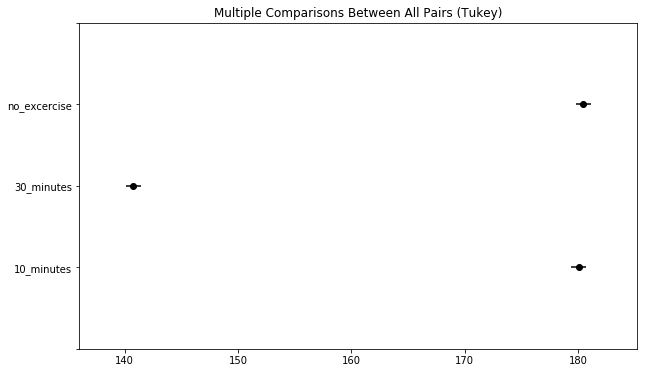

In [159]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=weight_df.weight,     
                          groups=weight_df.regime,   
                          alpha=0.05)  

tukey.plot_simultaneous()    

tukey.summary()              